# Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import timeit

In [2]:
plt.style.use('ggplot')

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [5]:
from tpot import TPOTClassifier

# Data Loading

In [45]:
# Membaca file csv pada link dan membuat dataframe
df = pd.read_csv('https://raw.githubusercontent.com/alleFarell/Datasets-ML/main/weatherAUS.csv')
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


# Eploratory Data Analaysis

In [7]:
# Dimensi dataframe
print('Jumlah record data: ',df.shape[0])
print('Jumlah feature data: ',df.shape[1])

Jumlah record data:  145460
Jumlah feature data:  23


In [8]:
# Informasi data tiap kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
# Menampilkan ringkasan statistik dataframe
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


## Data Visualization

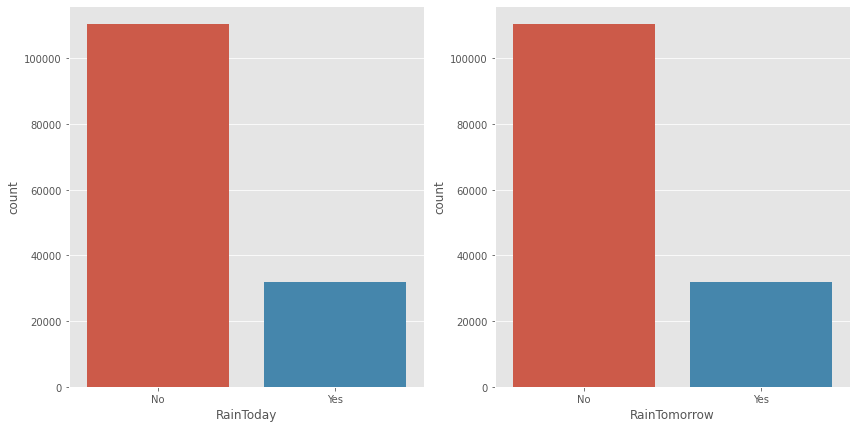

In [10]:
# Visualisasi data RainToday dengan RainTomorrow
plt.figure(figsize=(14,7))
plt.subplot(121)
sns.countplot(x='RainToday',data=df)

plt.subplot(122)
sns.countplot(x='RainTomorrow',data=df)
plt.show()

# Preprocessing Data

## Drop unnecessary feature

In [46]:
# Drop fitur yang tidak dibutuhkan dalam analisis
# Drop fitur "Date"
df = df.drop('Date', axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


## Handling Missing Values

In [47]:
# Melakukan pengecekkan Missing Values
print('Jumlah Missing Values Pada Tiap Fitur: \n')
print(df.isna().sum())

Jumlah Missing Values Pada Tiap Fitur: 

Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64


In [13]:
# Menghitung persentase missing values tiap fitur / kolom
percent_missing = (df.isnull().sum()/len(df)) * 100
percent_missing

Location          0.000000
MinTemp           1.020899
MaxTemp           0.866905
Rainfall          2.241853
Evaporation      43.166506
Sunshine         48.009762
WindGustDir       7.098859
WindGustSpeed     7.055548
WindDir9am        7.263853
WindDir3pm        2.906641
WindSpeed9am      1.214767
WindSpeed3pm      2.105046
Humidity9am       1.824557
Humidity3pm       3.098446
Pressure9am      10.356799
Pressure3pm      10.331363
Cloud9am         38.421559
Cloud3pm         40.807095
Temp9am           1.214767
Temp3pm           2.481094
RainToday         2.241853
RainTomorrow      2.245978
dtype: float64

In [14]:
# Drop fitur / kolom dengan persentase missing values lebih dari 30%
df = df.drop(['Evaporation','Sunshine','Cloud9am','Cloud3pm'], axis=1)
df.shape

(145460, 18)

In [15]:
# Identifikasi colom numerical dan categorical
cat_col = [i for i in df.select_dtypes(include='object')]
num_col = [i for i in df.select_dtypes(include='number')]

In [16]:
# Categorical Columns
cat_col

['Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [17]:
# Numerical Columns
num_col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [18]:
## Mengatasi Missing Values

# Drop row dengan missing values pada Feature label / target
df['RainTomorrow'] = df['RainTomorrow'].dropna(axis=0)

# Melakukan imputasi missing values pada kolom categorical dengan modus
for col in cat_col:
    df[col] =  df[col].fillna(df[col].mode()[0])

# Melakukan imputasi missing values pada kolom numerical dengan mean
for col in num_col:
    df[col] = df[col].fillna(df[col].mean())

In [19]:
# Memastikan tidak ada missing values tersisa
df.isna().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

## Data Transformation

In [20]:
# label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Melakukan Label Encoding pada setiap kolom Categorical
for col in cat_col:
    df[col] = le.fit_transform(df[col])

In [21]:
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,22.900000,0.6,13,44.00000,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0
1,2,7.4,25.100000,0.0,14,44.00000,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0
2,2,12.9,25.700000,0.0,15,46.00000,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0
3,2,9.2,28.000000,0.0,4,24.00000,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0
4,2,17.5,32.300000,1.0,13,41.00000,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,0,31.00000,9,1,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0,0
145456,41,3.6,25.300000,0.0,6,22.00000,9,3,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0,0
145457,41,5.4,26.900000,0.0,3,37.00000,9,14,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0,0
145458,41,7.8,27.000000,0.0,9,28.00000,10,3,13.0,7.0,51.0,24.0,1019.4,1016.5,15.1,26.0,0,0


## Outliers

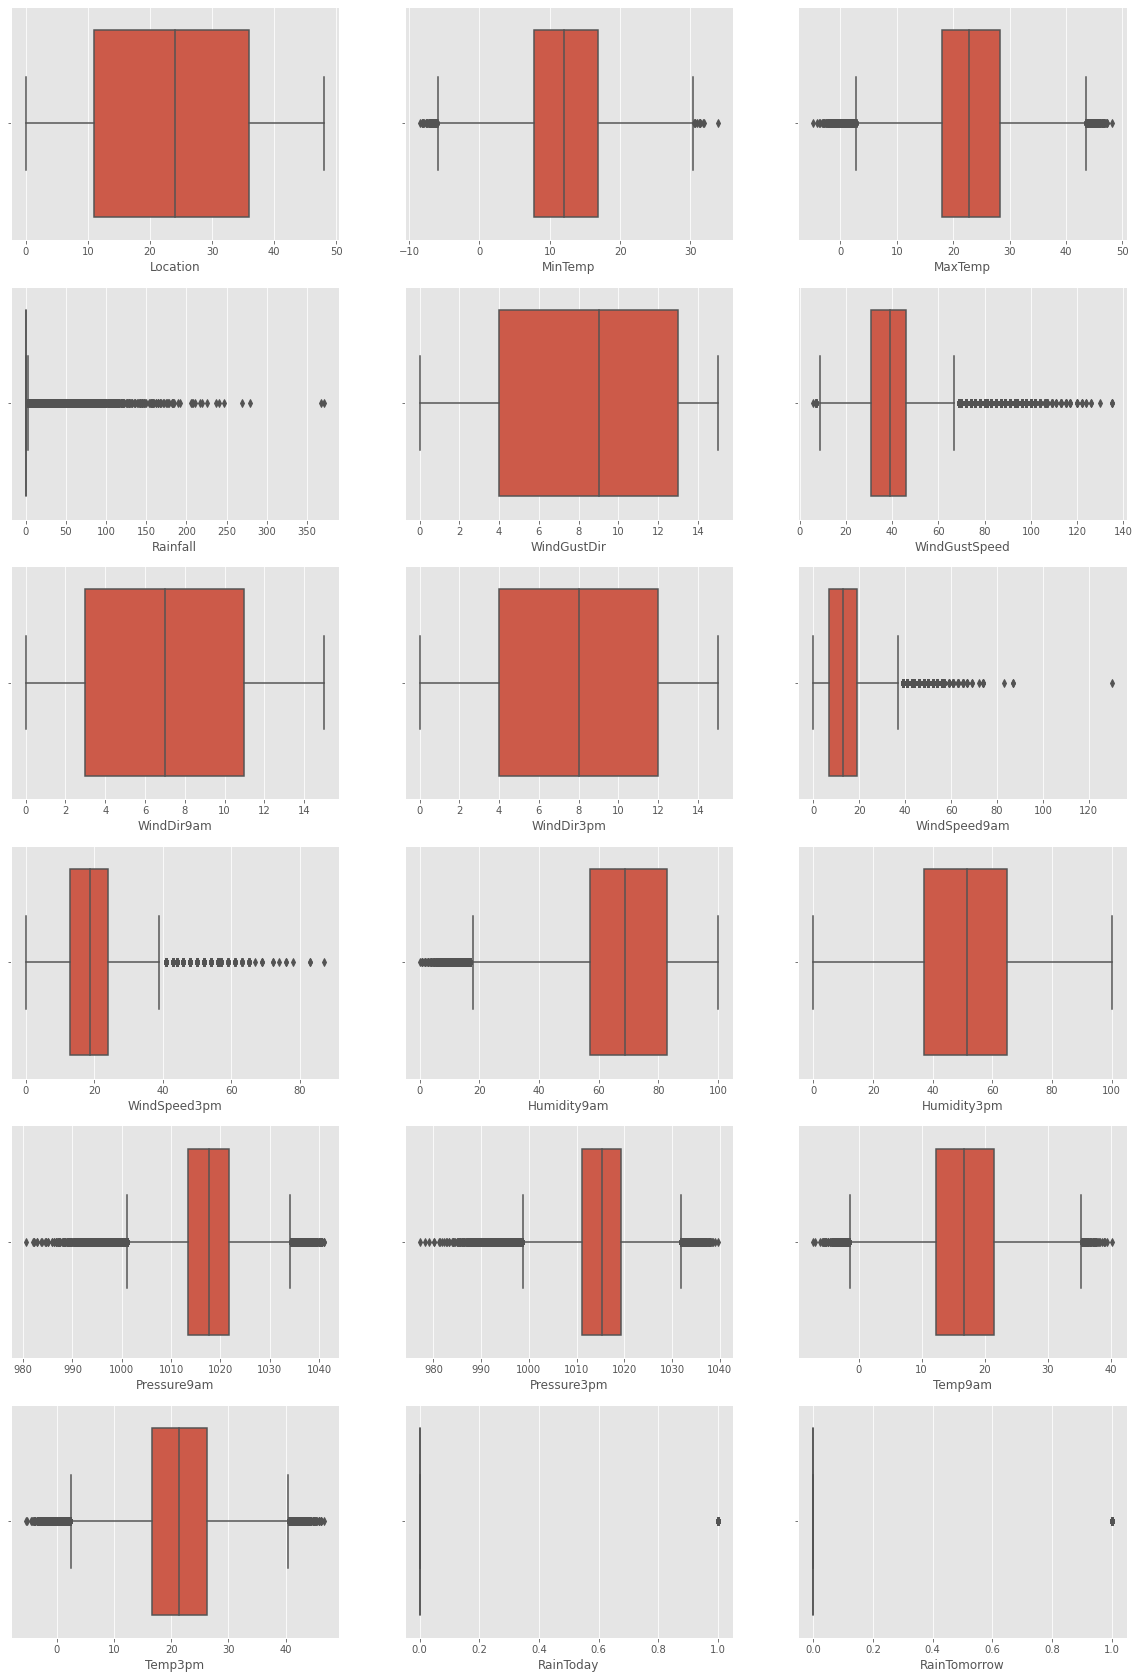

In [22]:
# Membuat boxplot untuk menampilkan pencilan / outliers
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(20,30))
for i, ax in zip(df.columns, axes.flat):
    sns.boxplot(x=df[i], ax=ax)
plt.show()

In [23]:
# Menghapus Outliers menggunakan metode Zscore
print('Dimensi DataFrame Sebelum Penghapusan Outliers', df.shape)
df_clean = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
print('Dimensi DataFrame Setelah Penghapusan Outliers', df_clean.shape)
print('Total Baris Outlier Terhapus:', (df.shape[0]-df_clean.shape[0]))

Dimensi DataFrame Sebelum Penghapusan Outliers (145460, 18)
Dimensi DataFrame Setelah Penghapusan Outliers (138208, 18)
Total Baris Outlier Terhapus: 7252


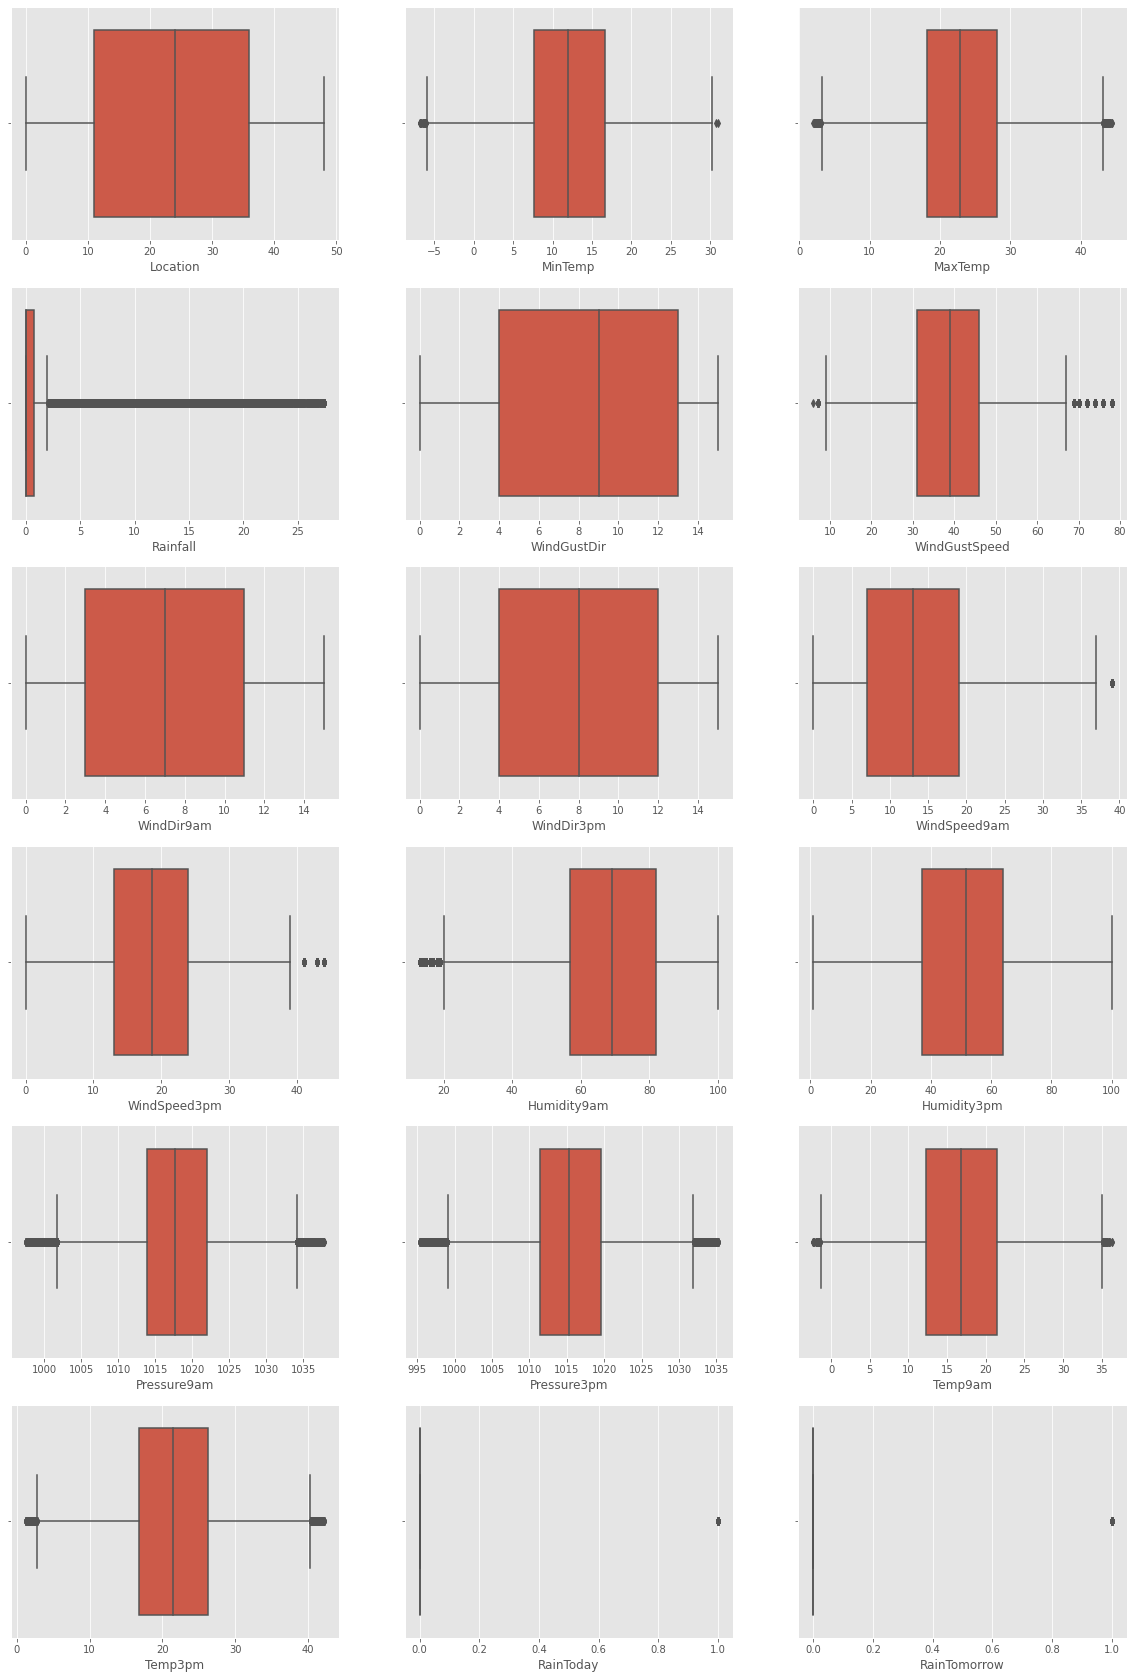

In [24]:
# Boxplot setelah outlier dihapus dengan metode Zscore
fig, axes = plt.subplots(ncols=3, nrows=6, figsize=(20,30))
for i, ax in zip(df_clean.columns, axes.flat):
    sns.boxplot(x=df_clean[i], ax=ax)
plt.show()

## Remove Duplicate Data

In [25]:
# Menghapus data duplikat dalam dataframe
print('Jumlah Duplikat Data Dalam Dataframe:', df_clean.duplicated().sum())
df_clean.drop_duplicates(keep='first', inplace=True)
print('Jumlah Duplikat Data Dalam Dataframe Setelah Dihapus:', df_clean.duplicated().sum())

Jumlah Duplikat Data Dalam Dataframe: 282
Jumlah Duplikat Data Dalam Dataframe Setelah Dihapus: 0


## Feature Selection

<AxesSubplot:>

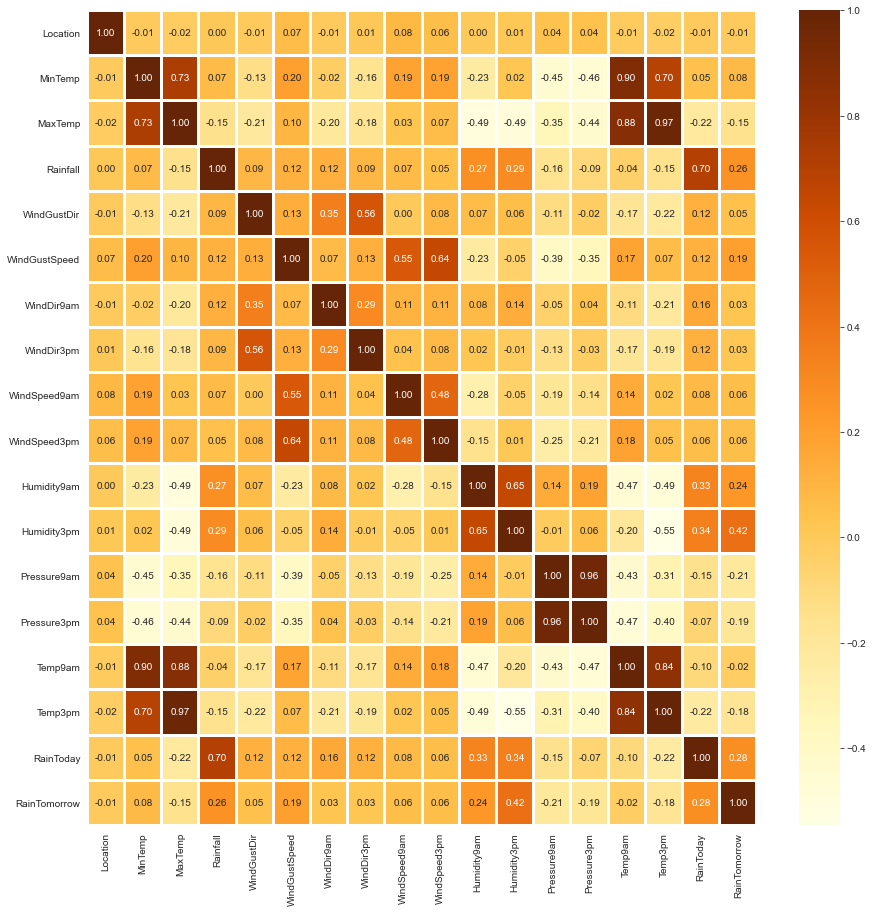

In [26]:
# Visualisasi Korelasi antar fitur menggunakan Heatmap
sns.set({'figure.figsize':(15,15)})
sns.heatmap(df_clean.corr(), annot=True, fmt='.2f', linewidths= 2, cmap="YlOrBr")

In [27]:
# Drop fitur dengan korelasi tinggi terhadap data feature lainnya selain data target "RainTomorrow"
df_ready = df_clean.drop(['Temp3pm','Temp9am','Humidity9am', 'MaxTemp'],axis=1)
df_ready.shape

(137926, 14)

# Data Prepare dan Data Split

In [28]:
# Memisahkan data feature dan data target
X = df_ready.drop('RainTomorrow', axis=1)
y = df_ready['RainTomorrow']

In [29]:
# Melakukan splitting data train dan data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

In [30]:
# Melakukan scaling data menggunakan metode standarisasi
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

# Automated Modelling Using Tpot

### WARNING!!! 
### Code dibawah membutuhkan running time yang cukup lama, Mohon berhati-hati sebelum melakukan running code

In [31]:
# Melakukan Training menggunakan Modelling dari TPOT Classifier

start = timeit.default_timer() # catat waktu mulai

tpot = TPOTClassifier(verbosity=2, generations=5)
tpot.fit(X_train_scaled, y_train)

stop = timeit.default_timer() # catat waktu selesai
lama_eksekusi = stop - start # lama eksekusi dalam satuan detik
print("Lama eksekusi: ",lama_eksekusi,"detik")

Optimization Progress:   0%|          | 0/600 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8571506253398585

Generation 2 - Current best internal CV score: 0.8572684429943811

Generation 3 - Current best internal CV score: 0.8572684429943811

Generation 4 - Current best internal CV score: 0.8572684429943811

Generation 5 - Current best internal CV score: 0.8572684429943811

Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=10, min_child_weight=18, n_estimators=100, n_jobs=1, subsample=0.7000000000000001, verbosity=0)
Lama eksekusi:  65407.0646432 detik


In [40]:
print('Total Lama Eksekusi TPOT:', round(lama_eksekusi/3600), 'Jam')

Total Lama Eksekusi TPOT: 18 Jam


In [32]:
# Pipiline terbaik yang ditemukan TPOT dalam 5 generasi
tpot.fitted_pipeline_

Pipeline(steps=[('xgbclassifier',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, gpu_id=-1,
                               importance_type='gain',
                               interaction_constraints='', learning_rate=0.1,
                               max_delta_step=0, max_depth=10,
                               min_child_weight=18, missing=nan,
                               monotone_constraints='()', n_estimators=100,
                               n_jobs=1, num_parallel_tree=1, random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               subsample=0.7000000000000001,
                               tree_method='exact', validate_parameters=1,
                               verbosity=0))])

In [33]:
# Test accuracy
tpot.score(X_test_scaled, y_test)

0.8615239614297108

In [34]:
# Prediksi data test menggunakan model training
y_pred_tpot = tpot.predict(X_test_scaled)

## Model Evaluation

In [35]:
# Evaluasi model menggunakan Precision, recall, dan F1 score
print(confusion_matrix(y_test, y_pred_tpot), '\n')
print(classification_report(y_test, y_pred_tpot))

[[20870  1045]
 [ 2775  2896]] 

              precision    recall  f1-score   support

           0       0.88      0.95      0.92     21915
           1       0.73      0.51      0.60      5671

    accuracy                           0.86     27586
   macro avg       0.81      0.73      0.76     27586
weighted avg       0.85      0.86      0.85     27586



# Export Dataset Hasil Eksplorasi

In [42]:
df_ready.to_csv('dataset_hasil_eksplorasi.csv',index = False,encoding='utf-8')